# Лабораторная работа 2. Методы поиска

**Цель работы:** ознакомление с алгоритмами поиска в линейных и нелинейных структурах и оценкой эффективности алгоритмов.<br>
**Номер варианта:** 14

## Задание 1: *Поиск корней уравнений методом Ньютона*

### 1. Теоретическое описание алгоритма



**Метод Ньютона, алгоритм Ньютона** — это итерационный численный метод нахождения корня (нуля) заданной функции. Поиск решения осуществляется путём построения последовательных приближений и основан на принципах простой итерации.

**Описание метода:**

Чтобы численно решить уравнение $f(x)=0$ методом простой итерации, его необходимо привести к эквивалентному уравнению: $x=\varphi(x)$, где $\varphi$  — сжимающее отображение.

Для наилучшей сходимости метода в точке очередного приближения $x^{*}$ должно выполняться условие $\varphi′(x^{*})=0$. Решение данного уравнения ищут в виде $\displaystyle \varphi (x)=x+\alpha (x)f(x)$, тогда:

$\displaystyle \varphi '(x^{*})=1+\alpha '(x^{*})f(x^{*})+\alpha (x^{*})f'(x^{*})=0.$

В предположении, что точка приближения «достаточно близка» к корню $~{\tilde  {x}}$ и что заданная функция непрерывна 
$\displaystyle (f(x^{*})\approx f({\tilde {x}})=0)$, окончательная формула для $\alpha(x)$ такова:

$\displaystyle \alpha (x)=-{\frac {1}{f'(x)}}.$

С учётом этого функция $\varphi (x)$ определяется:

$\displaystyle \varphi (x)=x-{\frac {f(x)}{f'(x)}}.$

При некоторых условиях эта функция в окрестности корня осуществляет сжимающее отображение.

### 2. Блок-схема алгоритма

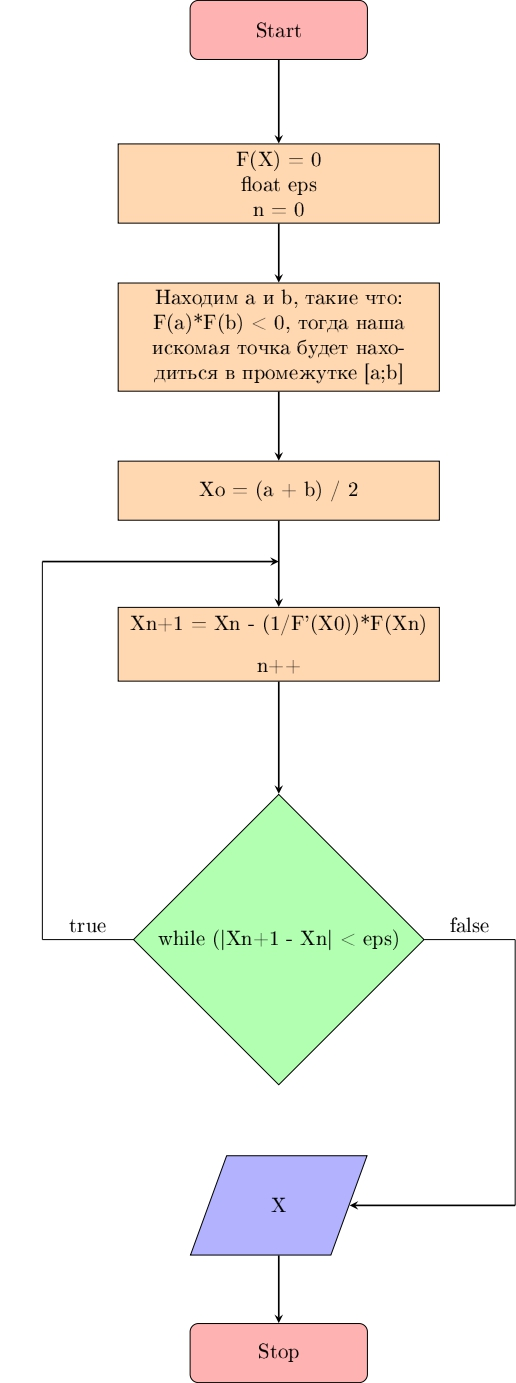

### 3. Описание алгоритма на псевдокоде

```
algorithm Newton_method:
    input:
        function, F(X) = 0;      # заданная функция
        float, eps;              # заданная точность
        integer, n = 0;          
    output:
        float, X;                # наименьший корень уравнения
    
    # Находим a и b, такие что: F(a)*F(b) < 0
    # Тогда наша искомая точка будет находится в промежутке [a;b]
    
    X0 = (a + b) / 2
    
    do
    {
        Xn+1 = Xn - (1/F'(X0))*F(Xn);
        n++;
    } 
    while (|Xn+1 - Xn| < eps)
    
    cout << "наименьший корень уравнения " << X;
```

### 4. Достоинства и недостатки алгоритма

**Достоинства:**
1. Сходимость метода касательных квадратичная, порядок сходимости равен 2. *Таким образом, сходимость метода касательных Ньютона очень быстрая.*

**Недостатки:**
1. Локальность метода, поскольку он гарантированно сходится при произвольном стартовом приближении только в том случае, если везде выполнено условие $\displaystyle \frac{|ff''|}{{f'}^2} < 1$, в противной ситуации сходимость есть лишь в некоторой окрестности корня.

2. Необходимость вычисления производных на каждом шаге.

### 5. Реализация алгоритма

In [29]:
from scipy import misc

def NewtonsMethod(f, x, tolerance=0.000001):
    while True:
        x1 = x - f(x) / misc.derivative(f, x)
        t = abs(x1 - x)
        if t < tolerance:
            break
        x = x1
    return x

def f(x):
    return x**2+4*x+2


# параметры параболы
a = 1
b = 4

X_vertex = b / ((-2) * a) # х вершины

# определяем наибольший X_a < X_vertex, при котором функция будет больше нуля (для выполнения условия Вейер-Штрасса)
X_a = X_vertex
while (X_a <= X_vertex):
    if f(X_a) > 0:
        break
    else:
        X_a -= 0.1

# х_center - серединка интервала, где находится наше наименьшее решение
x_center = (X_vertex + X_a) / 2 
x0 = NewtonsMethod(f, x_center)

print('x0: ', round(x0, 4))
print("f(x0) = ", round(x0**2+(4.0)*x0+2))

x0:  -3.4142
f(x0) =  0


C:\Users\Dns\AppData\Local\Temp\ipykernel_19492\2848937846.py:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x1 = x - f(x) / misc.derivative(f, x)


## Задание 2: *Поиск подстроки в строке методом Кнута — Морриса — Пратта*

### 1. Теоретическое описание алгоритма

**Алгоритм Кнута — Морриса — Пратта (КМП-алгоритм)** — эффективный алгоритм, осуществляющий поиск подстроки в строке. Время работы алгоритма линейно зависит от объёма входных данных, то есть разработать асимптотически более эффективный алгоритм невозможно.

**Описание алгоритма:**

Рассмотрим сравнение строк на позиции $\displaystyle i$, где образец $\displaystyle S[0,m-1]$ сопоставляется с частью текста 
$\displaystyle \displaystyle T[i,i+m-1]$. Предположим, что первое несовпадение произошло между $\displaystyle \displaystyle T[i+j]$ и $\displaystyle S[j]$, где $\displaystyle 1<j<m$. Тогда $\displaystyle T[i,i+j-1]=S[0,j-1]=P$ и $\displaystyle a=T[i+j]\neq S[j]=b$.

При сдвиге вполне можно ожидать, что префикс (начальные символы) образца $\displaystyle S$ сойдется с каким-нибудь суффиксом (конечные символы) текста $\displaystyle P$. Длина наиболее длинного префикса, являющегося одновременно суффиксом, есть значение префикс-функции от строки $\displaystyle S$ для индекса $\displaystyle j$.

Это приводит нас к следующему алгоритму: пусть $\displaystyle {\rm {{\pi }[j]}}$ — значение префикс-функции от строки $\displaystyle S[0,m-1]$ для индекса $\displaystyle j$. Тогда после сдвига мы можем возобновить сравнения с места
$\displaystyle T[i+j]$ и $\displaystyle S[{\rm {{\pi }[j]]}}$ без потери возможного местонахождения образца. Можно показать, что таблица $\displaystyle {\rm {\pi }}$ может быть вычислена за $\displaystyle \Theta (m)$ сравнений перед началом поиска. А поскольку строка $\displaystyle T$ будет пройдена ровно один раз, суммарное время работы алгоритма будет равно $\displaystyle \Theta (m+n)$, где n — длина текста $\displaystyle T$.

### 2. Блок-схема алгоритма

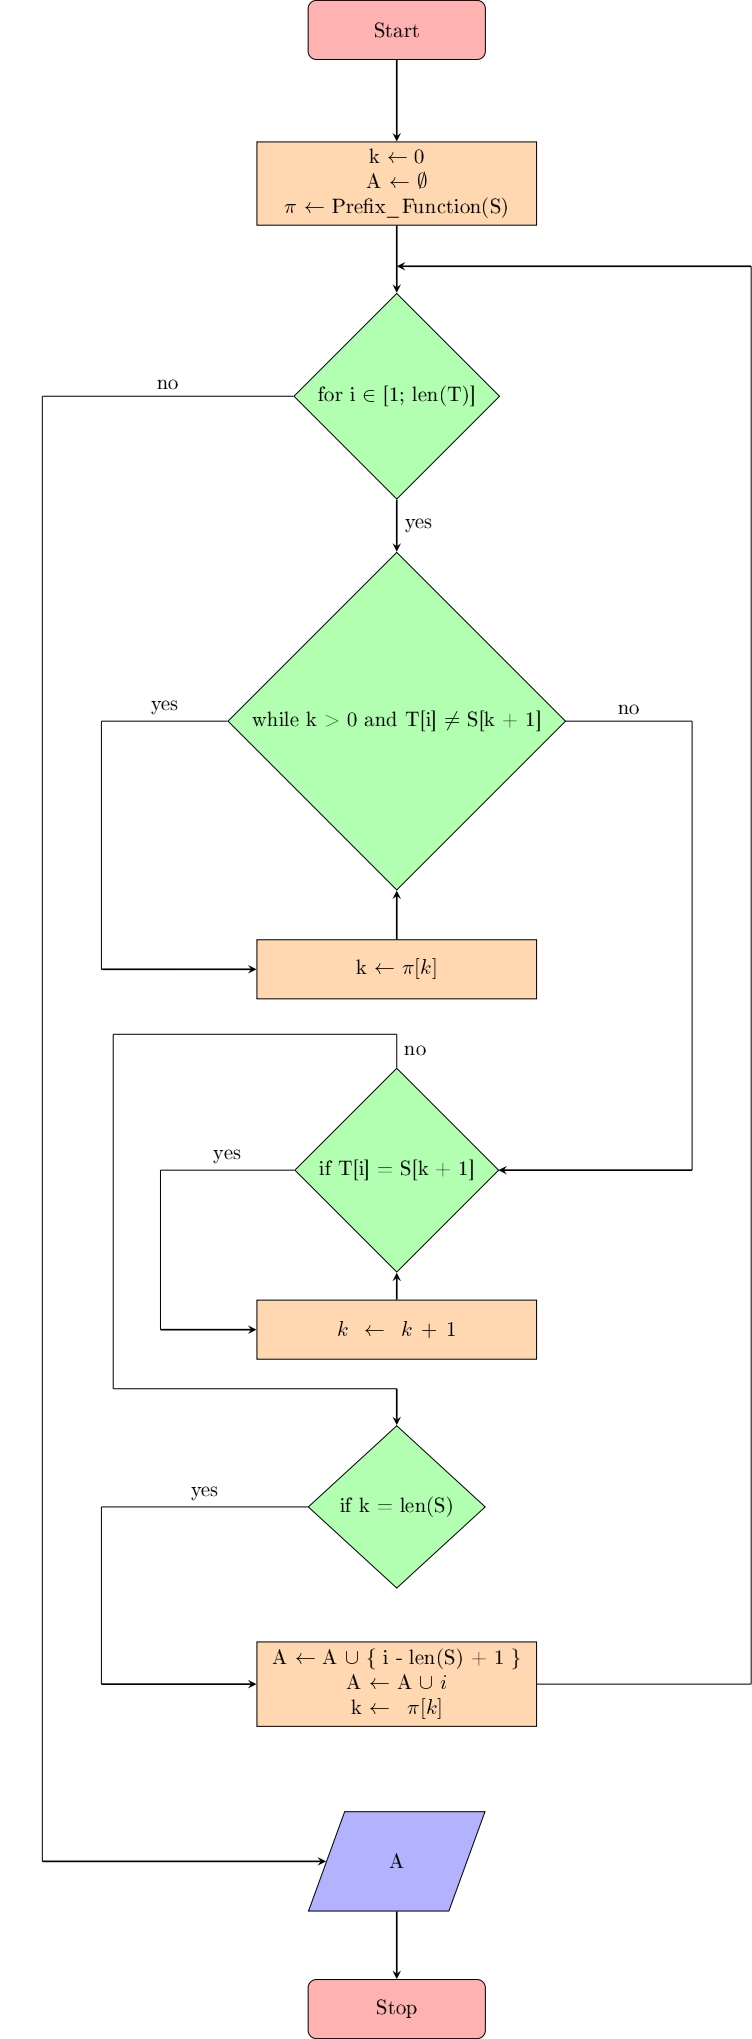

### 3. Описание алгоритма на псевдокоде

```
function KMP(S, T) 
  k ← 0
  A ← ø                                         # A - пустое множество
  π ← Prefix_Function(S)                        # считается префикс-функция от образца S
  for i = 1 to len(T) do                        # len(T) - длина строки T
    while k > 0 and T[i] ≠ S[k + 1] do
      k ←  π[k]
    end while
    if T[i] = S[k + 1] then
      k ← k + 1
    end if
    if k = len(S) then
      A ← A ⋃ {i - len(S) + 1}                  # это если мы в начале считали префикс-функцию
      A ← A ⋃ {i}                               # это если мы в начале считали z-функцию
      k ← π[k]
    end if
  end for
  return A  
end function

```

### 4. Достоинства и недостатки алгоритма

**Достоинства:**
1. Простота реализации
2. Быстрота

**Недостатки:** *не обнаружено*

### 5. Реализация алгоритма

In [2]:
def prefix(s):
    v = [0] * len(s)
    for i in range(1, len(s)):
        k = v[i - 1]
        while k > 0 and s[k] != s[i]:
            k = v[k - 1]
        if s[k] == s[i]:
            k = k + 1
        v[i] = k
    return v


def kmp(s, t, start_index):
    index = -1
    f = prefix(s)
    k = 0
    for i in range(start_index, len(t)):
        while k > 0 and s[k] != t[i]:
            k = f[k - 1]
        if s[k] == t[i]:
            k = k + 1
        if k == len(s):
            index = i - len(s) + 1
            break
    return index


def kmp_start(s, t):
    index = -len(s)
    found_indexes = []
    while True:
        index = kmp(s, t, index + 3)
        if index == -1:
            break
        else:
            found_indexes.append(index)
    return found_indexes


### 6. Тестировка корректности реализации алгоритма

**Стандартные тесты**

In [19]:
assert kmp_start('abc', 'labcmamacabc') == [1, 9], 'Ошибка в тесте на несколько встреч'

assert kmp_start('abc', 'mabcma') == [1], 'Ошибка в тесте на среднее значение'

assert kmp_start('abc', 'acacabc') == [4], 'Ошибка в тесте последнее значение'

assert kmp_start('abc', 'mmmmmm') == [], 'Ошибка в тесте на отсутствие встреч'

**Тесты на первой главе книги "Мэри Поппинс"**

In [21]:
file = open('Poppins_chapter1.txt', 'r')
text = file.read()

assert len(kmp_start('mary', text.lower())) == 29, 'Ошибка в подсчетах количества встреченных случаев'
print(len(kmp_start('mary', text.lower())), '- количество встреченных \"Mary\"')

29 - количество встреченных "Mary"


# Используемая литература

1. https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0
2. http://statistica.ru/branches-maths/chislennye-metody-resheniya-uravneniy/#s2
3. https://full-english-books.net/english-books/full-book-mary-poppins-read-online-chapter-2
4. https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9A%D0%BD%D1%83%D1%82%D0%B0_%E2%80%94_%D0%9C%D0%BE%D1%80%D1%80%D0%B8%D1%81%D0%B0_%E2%80%94_%D0%9F%D1%80%D0%B0%D1%82%D1%82%D0%B0#%D0%9E%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0_%D0%B8_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%B8_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B